In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df =pd.read_csv('Desktop/archive (1)/Salaries.csv')

C:\Users\DELL\AppData\Local\Temp\ipykernel_19520\886887608.py:1: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df =pd.read_csv('Desktop/archive (1)/Salaries.csv')


In [5]:
df['BasePay']

0            167411.18
1            155966.02
2            212739.13
3              77916.0
4             134401.6
              ...     
148649            0.00
148650    Not Provided
148651    Not Provided
148652    Not Provided
148653            0.00
Name: BasePay, Length: 148654, dtype: object

In [7]:
df['BasePay'] = pd.to_numeric(df['BasePay'], errors='coerce')  # Converts non-numeric values to NaN
df['BasePay'].mean()

df['BasePay'].mean()

66325.4488404877

In [9]:
df['OvertimePay'] = pd.to_numeric(df['BasePay'], errors='coerce')  # Converts non-numeric values to NaN
df['OvertimePay'].max()

319275.01

In [11]:
df[df['EmployeeName'] == 'JOSEPH DRISCOLL']['JobTitle']


24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

In [13]:
df[df['EmployeeName'] == 'JOSEPH DRISCOLL']['TotalPayBenefits']


24    270324.91
Name: TotalPayBenefits, dtype: float64

In [15]:

df[df['TotalPayBenefits'] == df['TotalPayBenefits'].max()]['EmployeeName']


0    NATHANIEL FORD
Name: EmployeeName, dtype: object

In [17]:
df[df['TotalPayBenefits'] == df['TotalPayBenefits'].min()]['EmployeeName']


148653    Joe Lopez
Name: EmployeeName, dtype: object

In [19]:
df.groupby('Year')[['BasePay', 'TotalPayBenefits']].mean()




,BasePay,TotalPayBenefits
Year,,
2011,63595.956517,71744.103871
2012,65436.406857,100553.229232
2013,69630.030216,101440.519714
2014,66564.421924,100250.918884


In [21]:
(df[df['Year']==2013]['JobTitle'].value_counts()==1).sum()

202

In [23]:
def chief(string):
    if 'chief' in string.lower():  # Removed incorrect syntax
        return True  # Fixed 'rreturn' typo
    else:
        return False

df['JobTitle'].apply(lambda x: chief(x)).sum()  # Fixed 'lamda' typo and function name


627

In [25]:
df['ntitles'] =df['JobTitle'].apply(len)

In [27]:
df[['ntitles','TotalPayBenefits']].corr() 

,ntitles,TotalPayBenefits
ntitles,1.000000,-0.036878
TotalPayBenefits,-0.036878,1.000000


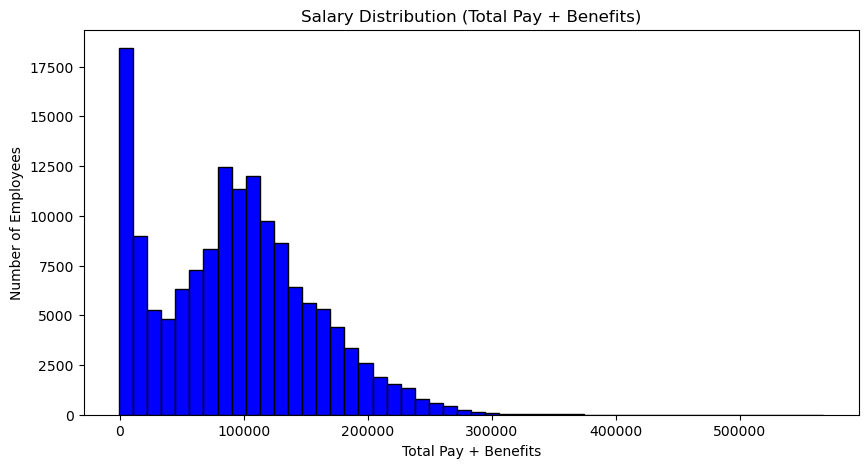

In [29]:
plt.figure(figsize=(10, 5))
plt.hist(df['TotalPayBenefits'].dropna(), bins=50, edgecolor='black', color='blue')
plt.xlabel("Total Pay + Benefits")
plt.ylabel("Number of Employees")
plt.title("Salary Distribution (Total Pay + Benefits)")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_832\3379239428.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Year'], y=df['TotalPayBenefits'],palette="coolwarm")


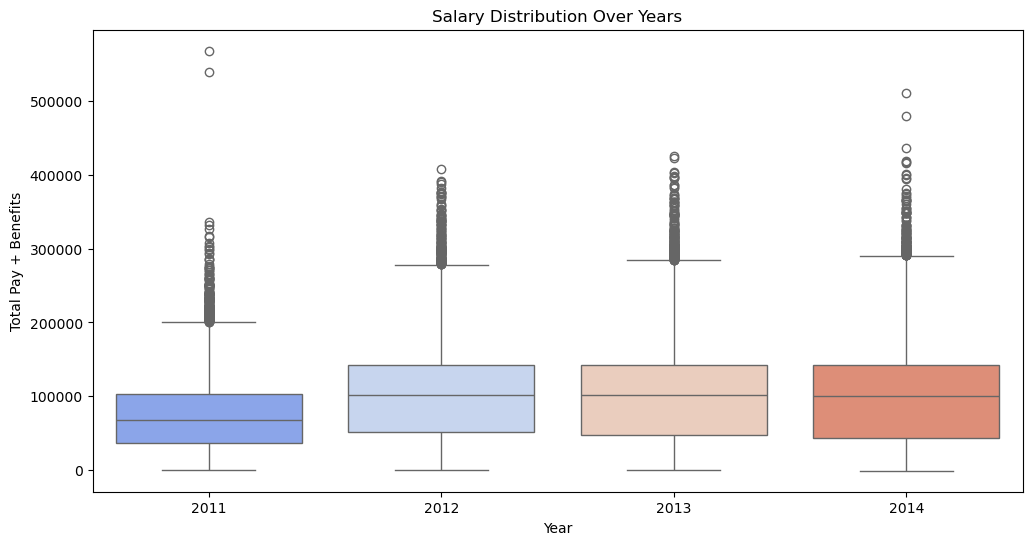

In [49]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Year'], y=df['TotalPayBenefits'],palette="coolwarm")
plt.xlabel("Year")
plt.ylabel("Total Pay + Benefits")
plt.title("Salary Distribution Over Years")
plt.show()

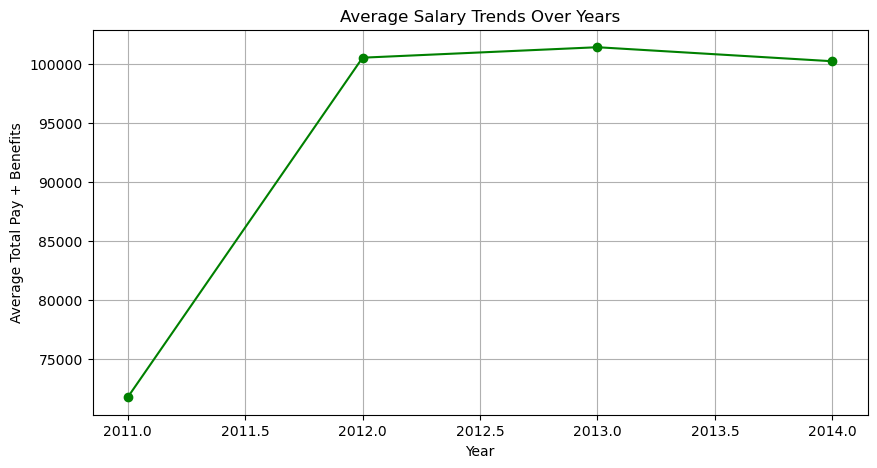

In [31]:
yearly_avg = df.groupby('Year')['TotalPayBenefits'].mean()
plt.figure(figsize=(10, 5))
plt.plot(yearly_avg.index, yearly_avg.values, marker='o', linestyle='-', color='green')
plt.xlabel("Year")
plt.ylabel("Average Total Pay + Benefits")
plt.title("Average Salary Trends Over Years")
plt.grid(True)
plt.show()

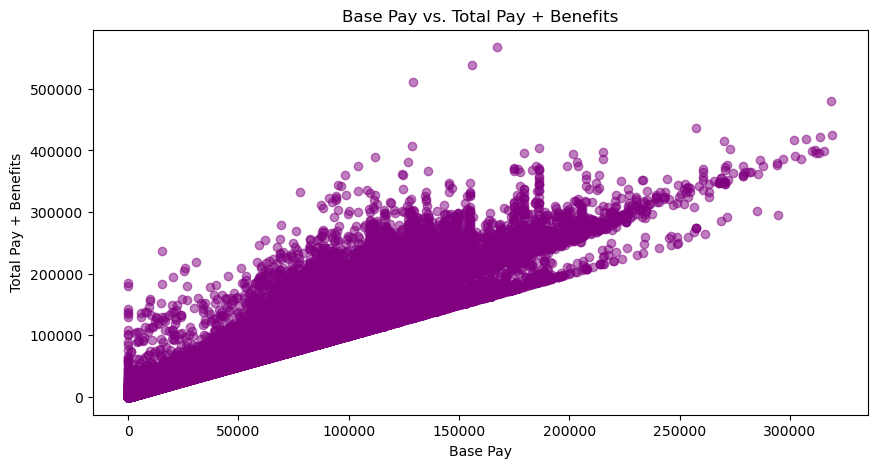

In [55]:


plt.figure(figsize=(10, 5))
plt.scatter(df['BasePay'], df['TotalPayBenefits'], alpha=0.5, color='purple')
plt.xlabel("Base Pay")
plt.ylabel("Total Pay + Benefits")
plt.title("Base Pay vs. Total Pay + Benefits")
plt.show()

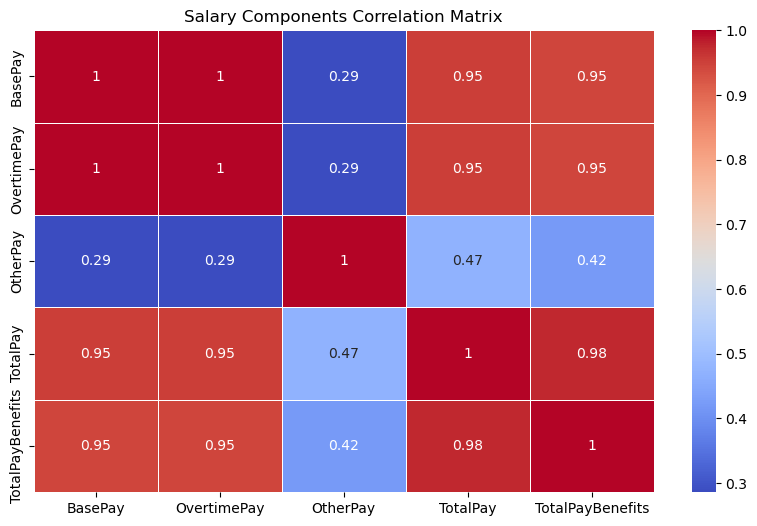

In [33]:

df['BasePay'] = pd.to_numeric(df['BasePay'], errors='coerce')
df['OvertimePay'] = pd.to_numeric(df['OvertimePay'], errors='coerce')
df['OtherPay'] = pd.to_numeric(df['OtherPay'], errors='coerce')
df['TotalPay'] = pd.to_numeric(df['TotalPay'], errors='coerce')
df['TotalPayBenefits'] = pd.to_numeric(df['TotalPayBenefits'], errors='coerce')
plt.figure(figsize=(10, 6))
sns.heatmap(df[['BasePay', 'OvertimePay', 'OtherPay', 'TotalPay', 'TotalPayBenefits']].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Salary Components Correlation Matrix")
plt.show()

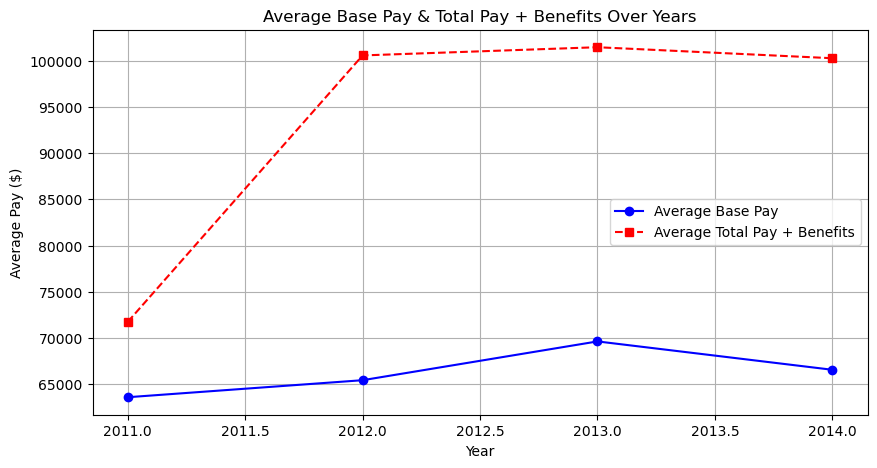

In [61]:
import matplotlib.pyplot as plt

# Fix: Group by Year with both 'BasePay' & 'TotalPayBenefits'
yearly_avg = df.groupby('Year')[['BasePay', 'TotalPayBenefits']].mean()

plt.figure(figsize=(10, 5))

# Plot Base Pay
plt.plot(yearly_avg.index, yearly_avg['BasePay'], marker='o', linestyle='-', 
         label='Average Base Pay', color='blue')

# Plot Total Pay + Benefits
plt.plot(yearly_avg.index, yearly_avg['TotalPayBenefits'], marker='s', linestyle='--', 
         label='Average Total Pay + Benefits', color='red')

plt.xlabel("Year")
plt.ylabel("Average Pay ($)")
plt.title("Average Base Pay & Total Pay + Benefits Over Years")
plt.legend()
plt.grid(True)
plt.show()


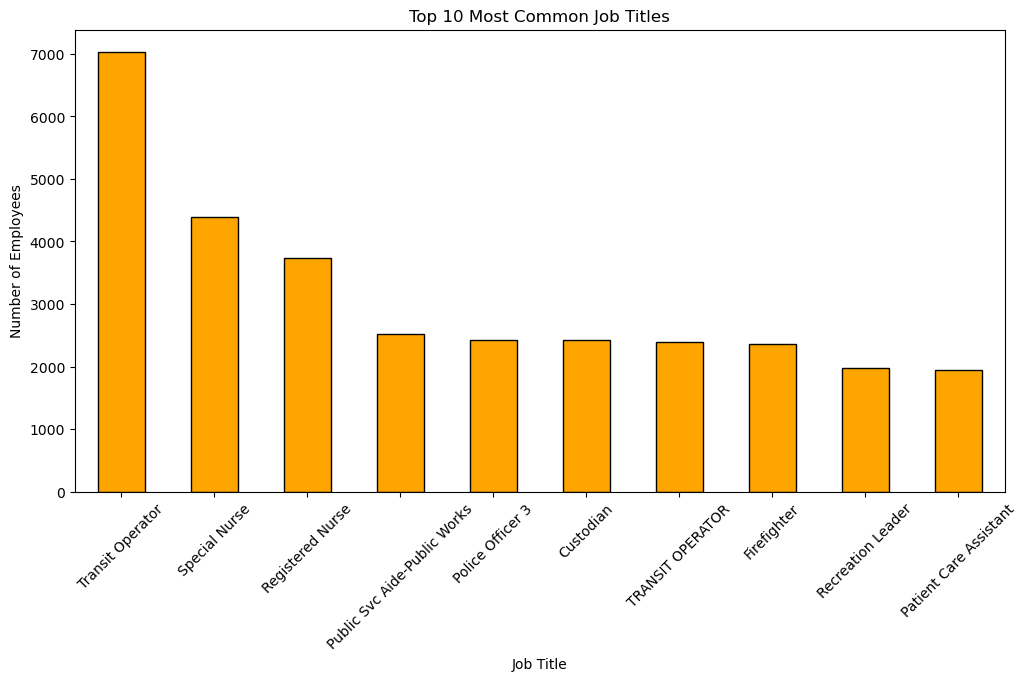

In [35]:
# Count job titles
job_counts = df['JobTitle'].value_counts()  # This creates job_counts

# Now we can plot it
plt.figure(figsize=(12, 6))
job_counts.head(10).plot(kind='bar', color='orange', edgecolor='black')
plt.xlabel("Job Title")
plt.ylabel("Number of Employees")
plt.title("Top 10 Most Common Job Titles")
plt.xticks(rotation=45)
plt.show()


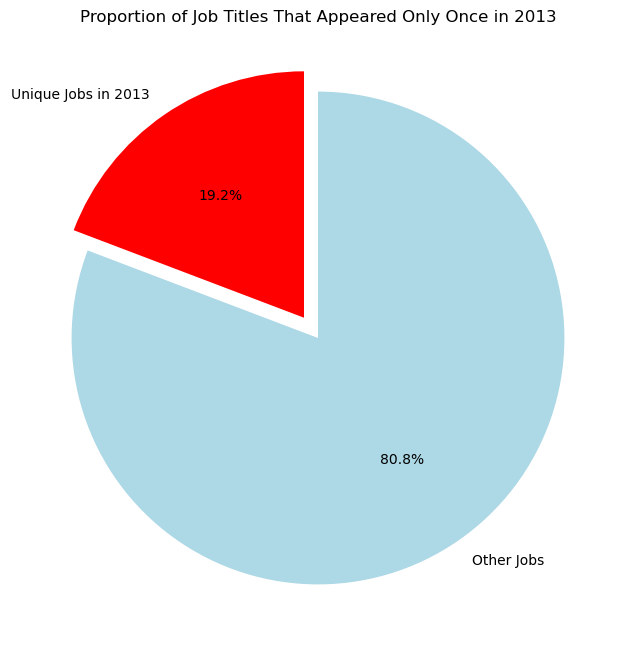

In [69]:
# Count job titles that appeared only once in 2013
unique_jobs_2013 = (df[df['Year'] == 2013]['JobTitle'].value_counts() == 1).sum()

# Now the pie chart will work
plt.figure(figsize=(8, 8))
labels = ['Unique Jobs in 2013', 'Other Jobs']
sizes = [unique_jobs_2013, df[df['Year'] == 2013]['JobTitle'].nunique() - unique_jobs_2013]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, 
        colors=['red', 'lightblue'], explode=[0.1, 0])
plt.title("Proportion of Job Titles That Appeared Only Once in 2013")
plt.show()


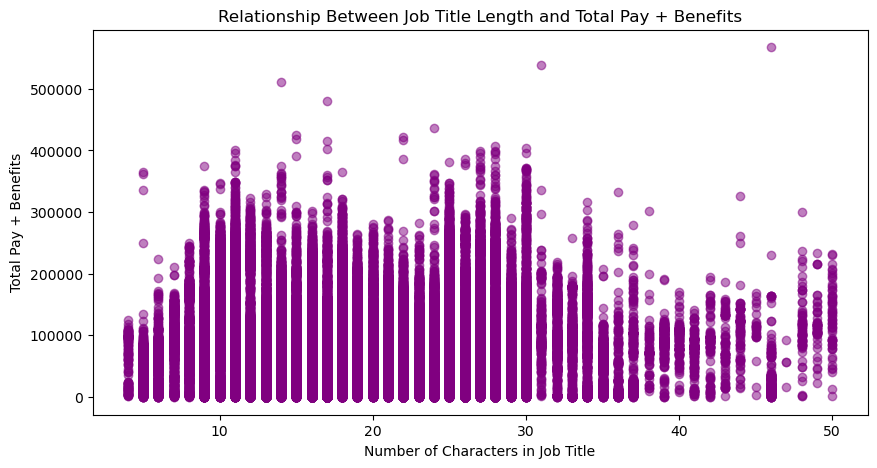

In [37]:



plt.figure(figsize=(10, 5))
plt.scatter(df['ntitles'], df['TotalPayBenefits'], alpha=0.5, color='purple')
plt.xlabel("Number of Characters in Job Title")
plt.ylabel("Total Pay + Benefits")
plt.title("Relationship Between Job Title Length and Total Pay + Benefits")
plt.show()

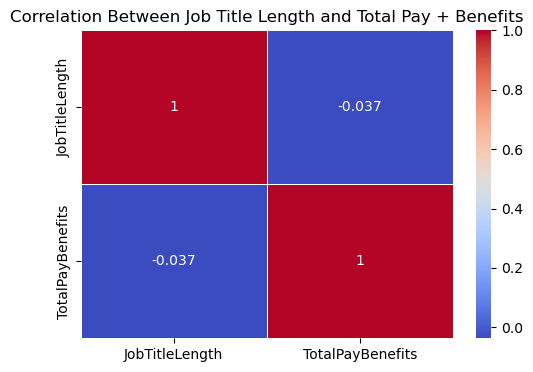

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new column for job title length
df['JobTitleLength'] = df['JobTitle'].apply(len)

# Compute correlation matrix (only numeric columns)
correlation = df[['JobTitleLength', 'TotalPayBenefits']].corr()

# Now, create the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Job Title Length and Total Pay + Benefits")
plt.show()


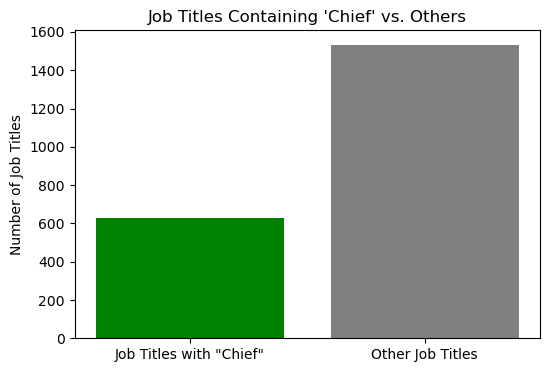

In [39]:
# Count the number of unique job titles
unique_jobs = df['JobTitle'].nunique()

# Count job titles that contain "Chief" (case insensitive)
chief_count = df['JobTitle'].str.contains("Chief", case=False, na=False).sum()

# Now, create the bar chart
plt.figure(figsize=(6, 4))
plt.bar(['Job Titles with "Chief"', 'Other Job Titles'], [chief_count, unique_jobs - chief_count], 
        color=['green', 'gray'])
plt.ylabel("Number of Job Titles")
plt.title("Job Titles Containing 'Chief' vs. Others")
plt.show()


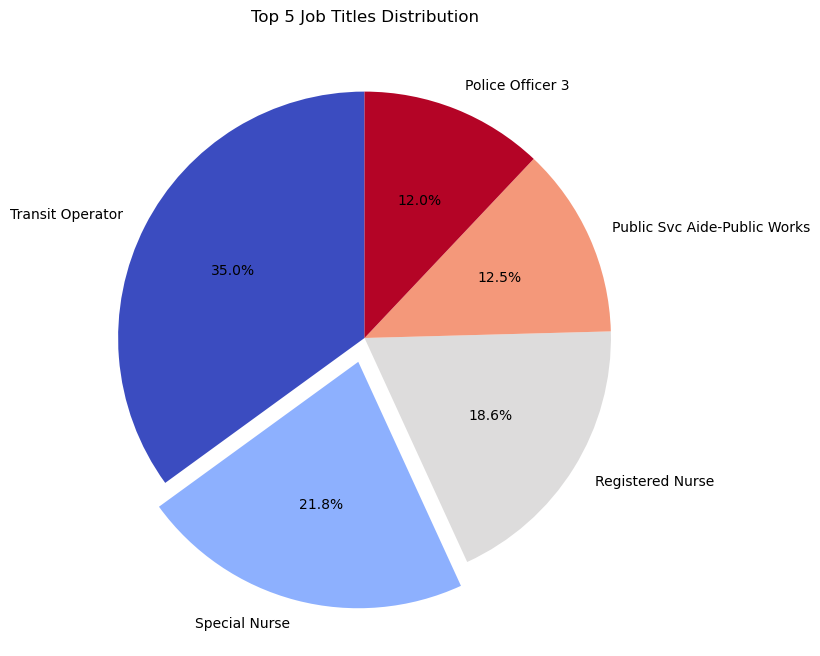

In [67]:
plt.figure(figsize=(8, 8))
df['JobTitle'].value_counts().head(5).plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm', explode=[0, 0.1, 0, 0, 0])
plt.title("Top 5 Job Titles Distribution")
plt.ylabel("")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_19520\2060932592.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[df['JobTitle'].isin(top_jobs_list)]['JobTitle'], y=df['TotalPayBenefits'], palette="muted")


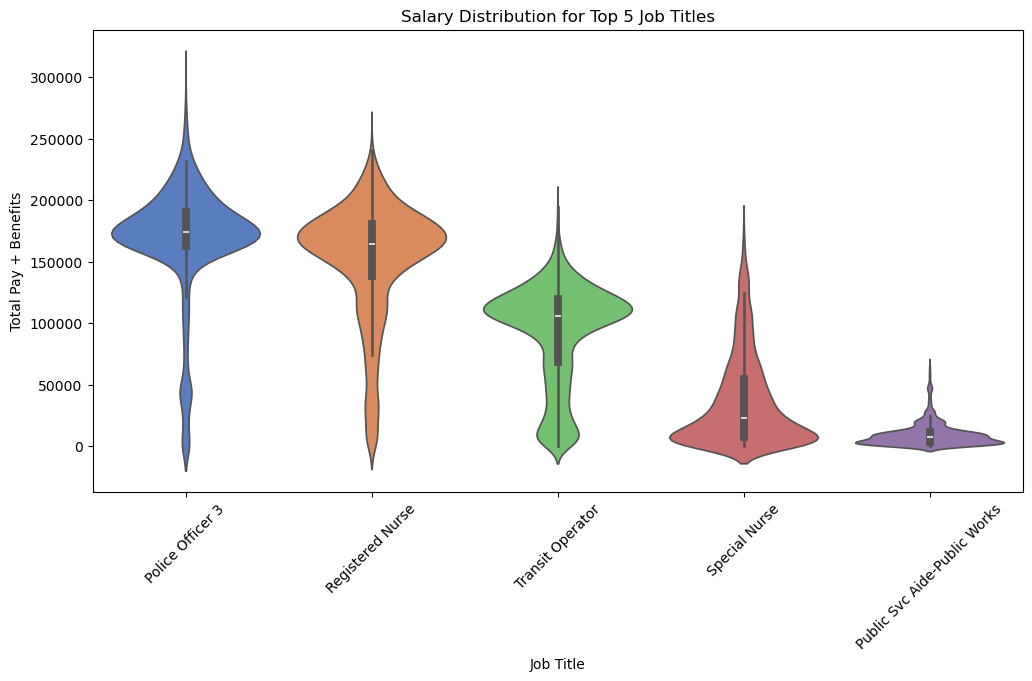

In [41]:
top_jobs_list = df['JobTitle'].value_counts().head(5).index
plt.figure(figsize=(12, 6))
sns.violinplot(x=df[df['JobTitle'].isin(top_jobs_list)]['JobTitle'], y=df['TotalPayBenefits'], palette="muted")
plt.xticks(rotation=45)
plt.xlabel("Job Title")
plt.ylabel("Total Pay + Benefits")
plt.title("Salary Distribution for Top 5 Job Titles")
plt.show()

In [63]:
top_jobs_list = df['JobTitle'].value_counts().head(5).index

In [65]:
top_jobs_list

Index(['Transit Operator', 'Special Nurse', 'Registered Nurse',
       'Public Svc Aide-Public Works', 'Police Officer 3'],
      dtype='object', name='JobTitle')